In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
from scipy import stats
import folium, fiona, branca
import seaborn as sbn
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from datetime import datetime
import mapclassify

In [10]:
provincias_gdf = gpd.read_file("../data/ecuador_provincias.gpkg")

In [11]:
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231..."
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853..."
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863..."
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891..."
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126..."
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092..."
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032..."
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192..."
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821..."
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494..."


In [12]:
centroid=provincias_gdf.geometry.centroid
mapbox_api_key = r"pk.eyJ1Ijoic3RhbWVuIiwiYSI6IlpkZEtuS1EifQ.jiH_c9ShtBwtqH9RdG40mw"; tileset_ID_str = "streets-v11"; tilesize_pixels = "256";
m=folium.Map(location=[centroid.y.mean(), centroid.x.mean()], zoom_start=12,
             tiles = f"https://api.mapbox.com/styles/v1/mapbox/{tileset_ID_str}/tiles/{tilesize_pixels}/{{z}}/{{x}}/{{y}}@2x?access_token={mapbox_api_key}",
             attr='MAPBOX')

<AxesSubplot: >

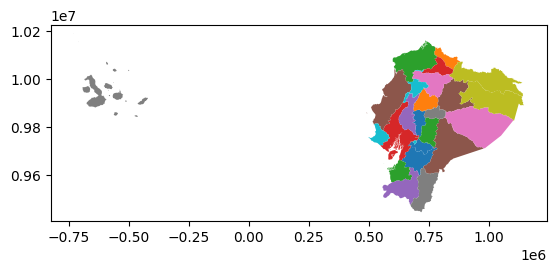

In [13]:
provincias_gdf.plot(column="DPA_PROVIN")

In [41]:
df = pd.read_csv("../data/teletrabajo_ec.csv")
df

,motivo_teletrabajo,genero,provincia_contrato,provincia_contrato (grupo),finalizado,contratos,anio_fecha_inicio_teletrabajo,anio_fecha_inicio_teletrabajo (grupo),canton_contrato,estado_teletrabajo,...,SITUACIÓN LEGAL_y,FECHA_CONSTITUCION_y,TIPO_y,PAÍS_CIA_y,REGIÓN_CIA_y,PROVINCIA_y,CANTÓN_CIA_y,CIUDAD_NEW_y,REPRESENTANTE_y,CAPITAL SUSCRITO_y
0,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,1,2017,Otro,QUITO,Activo,...,ACTIVA,01/06/2006,ANÓNIMA,ECUADOR,SIERRA,PICHINCHA,QUITO,QUITO,LEGALECUADOR REPRESENTACIONES CIA. LTDA.,"12.500,00"
1,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,1,2019,Otro,QUITO,Activo,...,ACTIVA,01/06/2006,ANÓNIMA,ECUADOR,SIERRA,PICHINCHA,QUITO,QUITO,LEGALECUADOR REPRESENTACIONES CIA. LTDA.,"12.500,00"
2,Emergente,Femenino,PICHINCHA,PICHINCHA,Vigente,1,2020,Otro,QUITO,Activo,...,ACTIVA,01/06/2006,ANÓNIMA,ECUADOR,SIERRA,PICHINCHA,QUITO,QUITO,LEGALECUADOR REPRESENTACIONES CIA. LTDA.,"12.500,00"
3,Emergente,Masculino,PICHINCHA,PICHINCHA,Vigente,2,2017,Otro,QUITO,Activo,...,ACTIVA,01/06/2006,ANÓNIMA,ECUADOR,SIERRA,PICHINCHA,QUITO,QUITO,LEGALECUADOR REPRESENTACIONES CIA. LTDA.,"12.500,00"
4,Emergente,Masculino,PICHINCHA,PICHINCHA,Vigente,3,2020,Otro,QUITO,Activo,...,ACTIVA,01/06/2006,ANÓNIMA,ECUADOR,SIERRA,PICHINCHA,QUITO,QUITO,LEGALECUADOR REPRESENTACIONES CIA. LTDA.,"12.500,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27747,Habitual,Masculino,GUAYAS,GUAYAS,Finalizado,1,2022,Otro,GUAYAQUIL,Activo,...,ACTIVA,10/02/2021,SOCIEDAD POR ACCIONES SIMPLIFICADA,ECUADOR,COSTA,GUAYAS,DAULE,DAULE,FIGUEROA ROMERO XAVIER DANIEL,"800,00"
27748,Habitual,Masculino,EL ORO,EL ORO,Finalizado,1,2022,Otro,MACHALA,Activo,...,ACTIVA,21/06/2001,ANÓNIMA,ECUADOR,COSTA,EL ORO,MACHALA,MACHALA,HUNT DANIEL JOHN WILLIAM,"100.000,00"
27749,Habitual,Masculino,MANABI,MANABI,Finalizado,1,2022,Otro,CHONE,Activo,...,ACTIVA,11/03/2021,ANÓNIMA,ECUADOR,COSTA,MANABI,CHONE,CHONE,MACIAS GARCIA CARLOS ENRIQUE,"10.000,00"
27750,Habitual,Masculino,AZUAY,AZUAY,Finalizado,1,2022,Otro,CUENCA,Activo,...,ACTIVA,15/03/2019,RESPONSABILIDAD LIMITADA,ECUADOR,SIERRA,AZUAY,CUENCA,CUENCA,YUMBLA VELEZ ELENA MARITZA,"10.000,00"


In [42]:
df.columns

Index(['motivo_teletrabajo', 'genero', 'provincia_contrato',
       'provincia_contrato (grupo)', 'finalizado', 'contratos',
       'anio_fecha_inicio_teletrabajo',
       'anio_fecha_inicio_teletrabajo (grupo)', 'canton_contrato',
       'estado_teletrabajo', 'fecha_consulta', 'mes_fecha_inicio_teletrabajo',
       'modo_ejecucion', 'Número de registros', 'ruc_empresa', 'razonSocial',
       'estadoSociedad', 'claseContribuyente', 'obligado',
       'actividadContribuyente', 'representanteLegal', 'agenteRepresentante',
       'personaSociedad', 'subtipoContribuyente', 'fechaInicioActividad',
       'fechaActualizacion', 'EXPEDIENTE_x', 'RUC_x', 'NOMBRE_x',
       'SITUACIÓN LEGAL_x', 'FECHA_CONSTITUCION_x', 'TIPO_x', 'PAÍS_CIA_x',
       'REGIÓN_CIA_x', 'PROVINCIA_x', 'CANTÓN_CIA_x', 'CIUDAD_NEW_x',
       'REPRESENTANTE_x', 'CAPITAL SUSCRITO_x', 'EXPEDIENTE_y', 'RUC_y',
       'NOMBRE_y', 'SITUACIÓN LEGAL_y', 'FECHA_CONSTITUCION_y', 'TIPO_y',
       'PAÍS_CIA_y', 'REGIÓN_CIA_y', 'PRO

In [48]:
df['CAPITAL SUSCRITO_y'] = df['CAPITAL SUSCRITO_y'].str.split(",",expand=True)[0]
df['CAPITAL SUSCRITO_y'] = df['CAPITAL SUSCRITO_y'].str.replace(".","")
df['CAPITAL SUSCRITO_y'] =df['CAPITAL SUSCRITO_y'].astype(int)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18328\2598057169.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['CAPITAL SUSCRITO_y'] = df['CAPITAL SUSCRITO_y'].str.replace(".","")


In [50]:
df.dtypes

motivo_teletrabajo                       object
genero                                   object
provincia_contrato                       object
provincia_contrato (grupo)               object
finalizado                               object
contratos                                 int64
anio_fecha_inicio_teletrabajo             int64
anio_fecha_inicio_teletrabajo (grupo)    object
canton_contrato                          object
estado_teletrabajo                       object
fecha_consulta                           object
mes_fecha_inicio_teletrabajo             object
modo_ejecucion                           object
Número de registros                       int64
ruc_empresa                               int64
razonSocial                              object
estadoSociedad                           object
claseContribuyente                       object
obligado                                 object
actividadContribuyente                   object
representanteLegal                      

In [57]:
dfProvincias= df[["PROVINCIA_y", "CAPITAL SUSCRITO_y"]].groupby('PROVINCIA_y').mean().sort_values(by='PROVINCIA_y')
dfProvincias = dfProvincias.fillna(0)
dfProvincias

,CAPITAL SUSCRITO_y
PROVINCIA_y,
AZUAY,5.732919e+06
BOLIVAR,3.584000e+04
CARCHI,1.174379e+04
CAÑAR,7.775874e+04
CHIMBORAZO,2.890333e+05
COTOPAXI,4.694612e+06
EL ORO,1.873696e+06
ESMERALDAS,1.230897e+06
GALAPAGOS,1.621104e+07


In [58]:
provincias_gdf=provincias_gdf.sort_values(by='DPA_DESPRO')

In [60]:
capital=dfProvincias["CAPITAL SUSCRITO_y"].tolist()
capital

[5732918.954095409,
 35840.0,
 11743.78947368421,
 77758.73684210527,
 289033.2826086957,
 4694611.915254237,
 1873696.3682795698,
 1230897.32,
 16211039.377777778,
 5623796.190982504,
 2243838.5913978494,
 1146250.2142857143,
 6184364.735849056,
 4208502.964135021,
 32011613.0,
 150513.0,
 6411562.862745098,
 800.0,
 12150870.6136938,
 143084.84848484848,
 1298134.0,
 340804.8611111111,
 4367415.695121951,
 133873689.73]

In [62]:
provincias_gdf=provincias_gdf.drop(24)
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231..."
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853..."
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891..."
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863..."
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092..."
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126..."
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032..."
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192..."
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821..."
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494..."


In [68]:
provincias_gdf["capital_suscrito"]=capital

In [69]:
provincias_gdf

,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area,geometry,capital_suscrito
0,1.0,01,AZUAY,0,2010,05,01,593,6.796516e+05,8.325642e+09,"MULTIPOLYGON (((678190.956 9723881.975, 678231...",5.732919e+06
1,2.0,02,BOLIVAR,0,2010,02,01,593,4.530732e+05,3.944871e+09,"MULTIPOLYGON (((710807.591 9872762.982, 710853...",3.584000e+04
3,4.0,04,CARCHI,0,2010,04,01,593,4.739416e+05,3.779952e+09,"MULTIPOLYGON (((779010.257 10132276.997, 77891...",1.174379e+04
2,3.0,03,CAÑAR,0,2010,05,01,593,4.020828e+05,3.146684e+09,"MULTIPOLYGON (((708800.896 9751517.241, 708863...",7.775874e+04
5,6.0,06,CHIMBORAZO,0,2010,02,01,593,5.207470e+05,6.500470e+09,"MULTIPOLYGON (((748035.659 9841751.303, 748092...",2.890333e+05
4,5.0,05,COTOPAXI,0,2010,02,01,593,4.433564e+05,6.109122e+09,"MULTIPOLYGON (((730087.931 9962764.026, 730126...",4.694612e+06
6,7.0,07,EL ORO,0,2010,03,02,593,9.832850e+05,5.743354e+09,"MULTIPOLYGON (((588147.383 9619864.070, 588032...",1.873696e+06
7,8.0,08,ESMERALDAS,0,2010,04,02,593,1.784550e+06,1.607734e+10,"MULTIPOLYGON (((621920.854 10030817.553, 62192...",1.230897e+06
8,9.0,09,GUAYAS,0,2010,03,02,593,3.646697e+06,1.533582e+10,"MULTIPOLYGON (((592899.868 9666806.067, 592821...",1.621104e+07
9,10.0,10,IMBABURA,0,2010,04,01,593,4.904138e+05,4.583470e+09,"MULTIPOLYGON (((804904.582 10084302.549, 80494...",5.623796e+06


<AxesSubplot: >

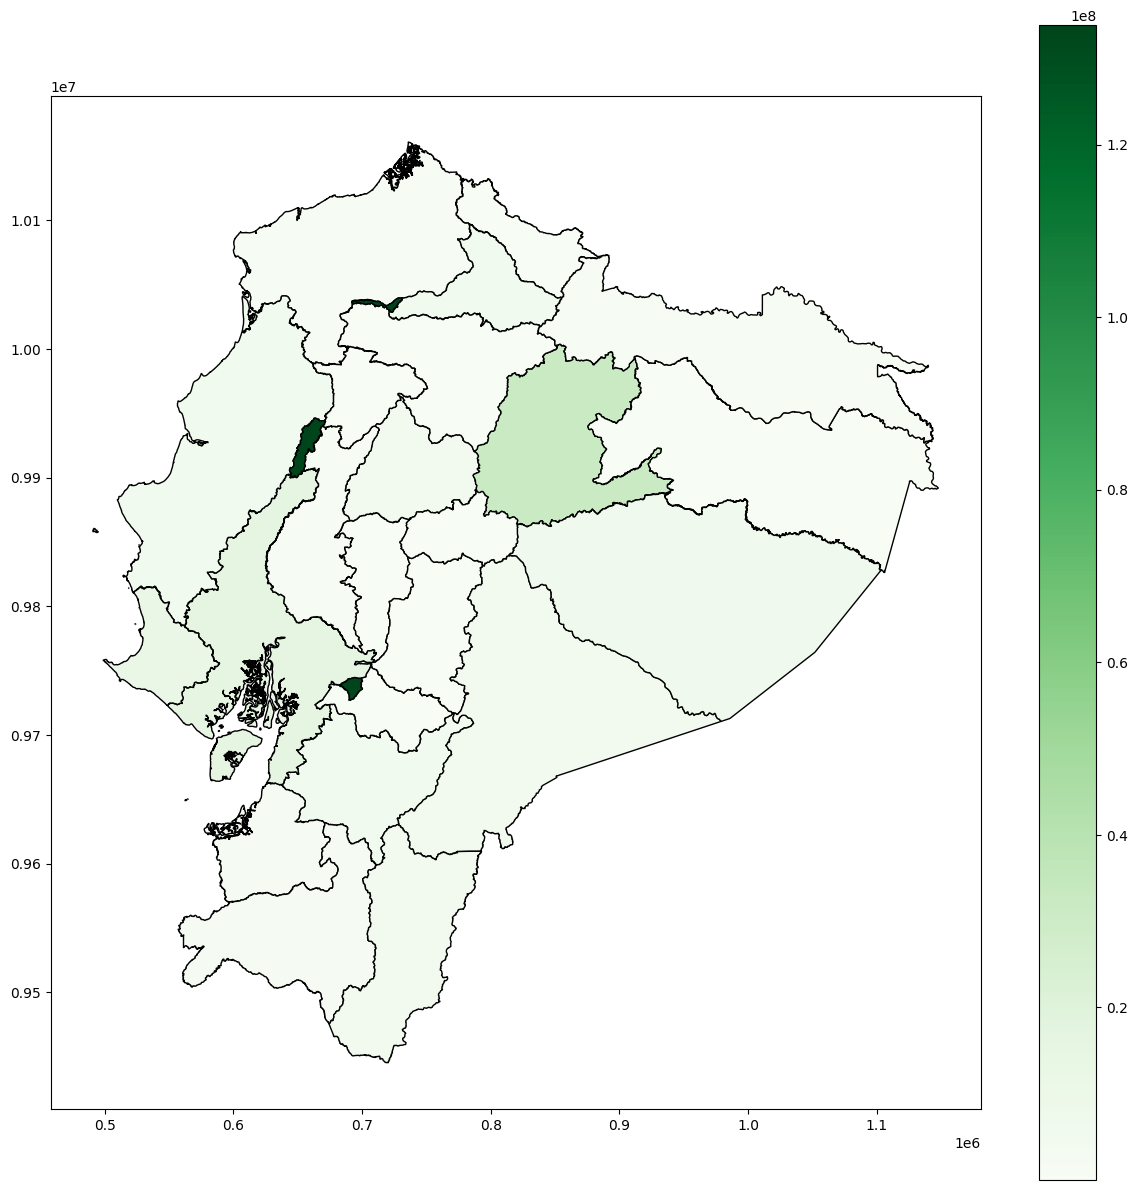

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
provincias_gdf.plot(ax=ax,column="capital_suscrito",cmap='Greens', edgecolor='k', legend=True)